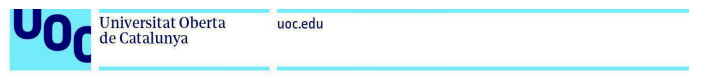

In [771]:
Image(filename='logo.png')

# 22.527 - Analítica de clientes
# PEC 2: Segmentación de clientes. Análisis de Conglomerados
## realizada por:  Alberto Rodríguez Álvarez

In [994]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
# import plotly.figure_factory as ff # Unexpected exception formatting exception. Falling back to standard exception

from IPython.display import Image, display
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram


import time

In [774]:
# !pip install -U kaleido # plot to jpg
# !pip install --upgrade "kaleido==0.1.*"
# problemas con versiones de Kaleido...
# https://stackoverflow.com/questions/69016568/unable-to-export-plotly-images-to-png-with-kaleido

# !pip install plotly==5.2.1
# pip install --upgrade plotly
# !pip install umap-learn

In [775]:
import warnings
warnings.filterwarnings('ignore')

In [776]:
df = pd.read_csv('data_r2_25.csv')
df_original = df
df.head()

,CUSTOMER_ID,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA,GENDER,JOB_SECTOR
0,C18658,2.850024,0.181818,114.56,0.0,114.56,0.000000,0.250000,0.250000,0.000000,0,3,1000.0,403.212926,130.700011,12,3,0,MALE,Engineering
1,C18844,469.319087,0.818182,383.81,0.0,383.81,870.533909,0.583333,0.500000,0.333333,6,14,1500.0,57.924613,335.598994,12,18,0,FEMALE,Finance
2,C12288,1504.334228,0.909091,565.00,565.0,0.00,0.000000,0.250000,0.000000,0.000000,0,3,2200.0,2511.315474,471.295665,12,20,5,MALE,Finance
3,C12767,2061.835735,1.000000,0.00,0.0,0.00,4320.771337,0.000000,0.000000,0.500000,12,0,4000.0,5451.599084,556.327998,12,19,0,MALE,Construction
4,C11595,18.218714,0.272727,89.00,0.0,89.00,0.000000,0.083333,0.083333,0.000000,0,1,4000.0,1095.921001,173.068884,12,4,1,MALE,Retail


### a. ¿Cuántas observaciones y variables tiene el dataset? ¿Qué tipo de variables son?

In [778]:
print(f'El conjunto de datos data_r2_25.csv tiene {df.shape[0]} muestras y {df.shape[1]} variables')

El conjunto de datos data_r2_25.csv tiene 7994 muestras y 20 variables


In [779]:
df.dtypes # muestra todos los tipo

CUSTOMER_ID                               object
SALDO_CUENTA                             float64
FRECUENCIA_ACTUALIZACION_SALDO           float64
IMPORTE_COMPRAS                          float64
IMPORTE_COMPRAS_ONOFF                    float64
IMPORTE_COMPRAS_APLAZO                   float64
IMPORTE_EFECTIVO_ADELANTADO              float64
FRECUENCIA_COMPRAS                       float64
FRECUENCIA_COMPRAS_APLAZO                float64
FRECUENCIA_EFECTIVO_ADELANTADO           float64
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO      int64
NUM_TRANSACCIONES_COMPRAS                  int64
LIMITE_CREDITO                           float64
IMPORTE_PAGOS                            float64
IMPORTE_MINIMO_PAGOS                     float64
TOTAL_TARJ_CREDITO                         int64
TOTAL_VISITAS_ONLINE                       int64
TOTAL_VISITAS_OFICINA                      int64
GENDER                                    object
JOB_SECTOR                                object
dtype: object

Los tipos de variables que se muestran corresponden con los datos, se han codificado bien las variables (no hay variables categoricas o factores como numéricas).

In [781]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Hay un total de",len(numericas),"variables numéricas. Son:\n",numericas )

Hay un total de 17 variables numéricas. Son:
 ['SALDO_CUENTA', 'FRECUENCIA_ACTUALIZACION_SALDO', 'IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 'IMPORTE_COMPRAS_APLAZO', 'IMPORTE_EFECTIVO_ADELANTADO', 'FRECUENCIA_COMPRAS', 'FRECUENCIA_COMPRAS_APLAZO', 'FRECUENCIA_EFECTIVO_ADELANTADO', 'NUM_TRANSACCIONES_EFECTIVO_ADELANTADO', 'NUM_TRANSACCIONES_COMPRAS', 'LIMITE_CREDITO', 'IMPORTE_PAGOS', 'IMPORTE_MINIMO_PAGOS', 'TOTAL_TARJ_CREDITO', 'TOTAL_VISITAS_ONLINE', 'TOTAL_VISITAS_OFICINA']


In [782]:
categoricas = df.select_dtypes(include=['object','category']).columns.tolist()
print("Hay un total de",len(categoricas),"variables categóricas. Son:\n",categoricas )

Hay un total de 3 variables categóricas. Son:
 ['CUSTOMER_ID', 'GENDER', 'JOB_SECTOR']


### b. ¿Tiene el dataset sesgos de género?

In [784]:
(df['GENDER'].value_counts(normalize=True) * 100).round(2)

GENDER
FEMALE    55.2
MALE      44.8
Name: proportion, dtype: float64

In [785]:
(df.groupby('GENDER')['SALDO_CUENTA'].mean().reset_index()).round(2)

,GENDER,SALDO_CUENTA
0,FEMALE,1566.21
1,MALE,1521.78


Se puede observar que el grado de paridad es aceptable. No existe sesgo aparente ni en cuanto al numero de observaciones ni al valor medio de 'Saldo en cuenta'

c. Con la librería pandas, utiliza la función que nos sirve para generar estadísticas
descriptivas.

¿Qué medidas estadísticas destacarías dados los valores obtenidos
para cada variable? ¿Puedes suponer a partir de estas medidas qué variables
tienen outliers?


In [788]:
# función: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SALDO_CUENTA,7994.0,1546.309503,2056.495837,0.000000,126.134981,864.868214,2014.959018,19043.13856
FRECUENCIA_ACTUALIZACION_SALDO,7994.0,0.877281,0.236988,0.000000,0.888889,1.000000,1.000000,1.00000
IMPORTE_COMPRAS,7994.0,980.533134,1954.559070,0.000000,35.925000,354.565000,1099.545000,32539.78000
IMPORTE_COMPRAS_ONOFF,7994.0,572.496469,1476.628493,0.000000,0.000000,31.695000,564.000000,26547.43000
IMPORTE_COMPRAS_APLAZO,7994.0,408.337100,896.445531,0.000000,0.000000,88.915000,466.722500,22500.00000
IMPORTE_EFECTIVO_ADELANTADO,7994.0,968.399100,2049.667814,0.000000,0.000000,0.000000,1105.841330,29282.10915
FRECUENCIA_COMPRAS,7994.0,0.488379,0.401801,0.000000,0.083333,0.500000,0.916667,1.00000
FRECUENCIA_COMPRAS_APLAZO,7994.0,0.363533,0.396713,0.000000,0.000000,0.166667,0.750000,1.00000
FRECUENCIA_EFECTIVO_ADELANTADO,7994.0,0.134831,0.199833,0.000000,0.000000,0.000000,0.222222,1.50000
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,7994.0,3.222042,6.664906,0.000000,0.000000,0.000000,4.000000,123.00000


Dada la tabla que nos ofrece esta función, si es posible analizar las variables. En primer lugar, podemos analizar si alguna variable podría ser un factor (categórica) dado su rango de valores. Por otro lado podemos ver los tanto los valores mínimos y máximos que junto con la media nos permite intuir los posibles Outliners presentes o inconsistencias. 

Vemos cuentas con saldo 0 o importes de compras 30 veces superior a la media.

In [790]:
df.describe().loc[['min','mean', 'max']]

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
min,0.000000,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,6.000000,0.000000,0.00000
mean,1546.309503,0.877281,980.533134,572.496469,408.3371,968.39910,0.488379,0.363533,0.134831,3.222042,14.575807,4473.361647,1710.939967,853.952727,11.515512,10.384914,1.65324
max,19043.138560,1.000000,32539.780000,26547.430000,22500.0000,29282.10915,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,61031.618600,12.000000,25.000000,6.00000


### d. Crea las siguientes gráficas y razona los que se observa:
i. Distribución por el saldo de cuenta


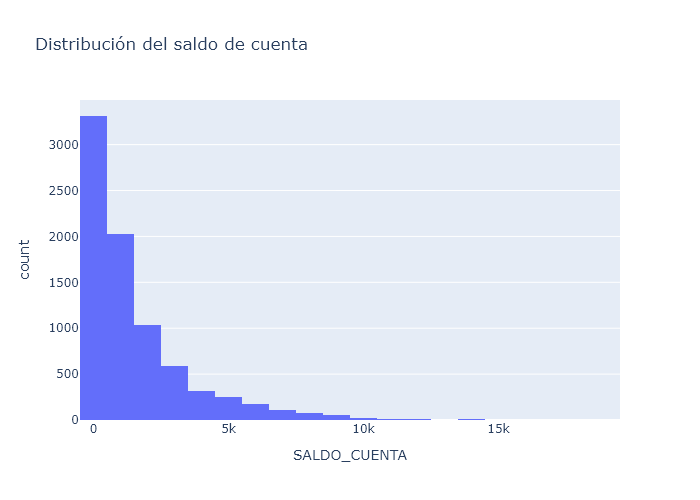

In [792]:
fig = px.histogram(df, x="SALDO_CUENTA", nbins=25, title="Distribución del saldo de cuenta")
fig.write_image('fig1.png')
display(Image('fig1.png', width=600))

ii. Relación entre el importe de compras y número de transacciones

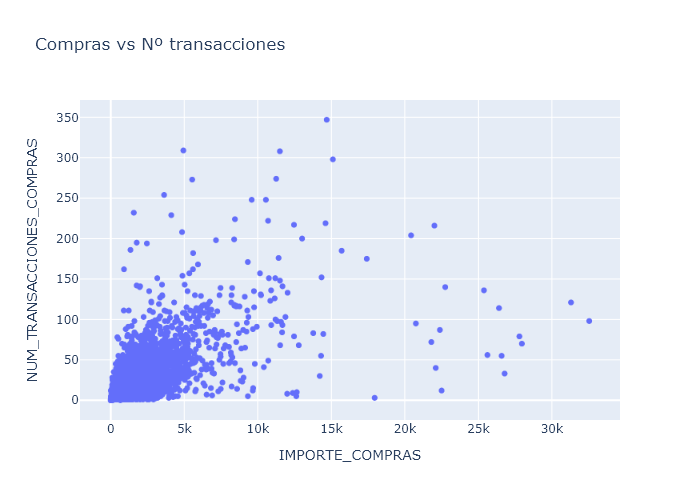

In [794]:
fig = px.scatter(df, x="IMPORTE_COMPRAS", y="NUM_TRANSACCIONES_COMPRAS", title="Compras vs Nº transacciones")
fig.write_image('fig2.png')
display(Image('fig2.png', width=600))

iii. Distribución del importe de compras por sector de trabajo.


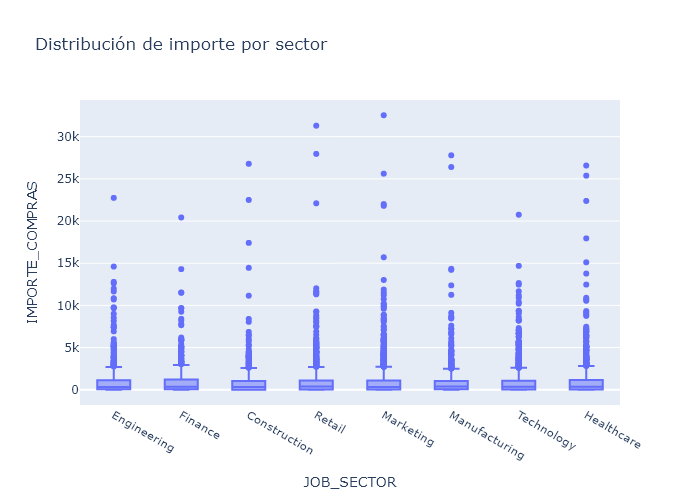

In [796]:
fig = px.box(df, x="JOB_SECTOR", y="IMPORTE_COMPRAS", title="Distribución de importe por sector")
fig.write_image('fig2.png')
display(Image('fig2.png', width=600))

### e. 
Crea una nueva variable llamada “tmp” que tendrá como valor 1 si el cliente ha
realizado menos de 10 compras online, tiene más de 2000€ de saldo y un
importe en compras mayor de 500€. Esta variable la crearás de dos maneras
diferentes: con la función iterrows de pandas y con una función vectorizada
usando la librería numpy. Crea el código correspondiente para cada
implementación y mide el tiempo de ejecución de la creación de la variable.
Explica el porqué de las diferencias de tiempo entre ambas ejecuciones.


In [798]:
#opcion 1 Iter
inicio_iter = time.time()
df['tmp_iter'] = 0
for indice, fila in df.iterrows():
    if fila['TOTAL_VISITAS_ONLINE'] < 10 and fila['SALDO_CUENTA'] > 2000 and fila['IMPORTE_COMPRAS'] > 500:
        df.at[indice, 'tmp_iter'] = 1
fin_iter = time.time()

# opcion 2 numpy
inicio_vect = time.time()
df['tmp_vect'] = np.where(
    (df['TOTAL_VISITAS_ONLINE'] < 10) & 
    (df['SALDO_CUENTA'] > 2000) & 
    (df['IMPORTE_COMPRAS'] > 500),
    1, 0
)
fin_vect = time.time()

tiempo_iter = round(fin_iter - inicio_iter,3)
tiempo_vect = round(fin_vect - inicio_vect,3)

print(f'El timepo para la opcion1 Iter es de {tiempo_iter} y para la opcion2 con Numpy es de {tiempo_vect}')

El timepo para la opcion1 Iter es de 0.245 y para la opcion2 con Numpy es de 0.001


In [799]:
# Elimina las variables
df = df.drop(columns=["CUSTOMER_ID", "JOB_SECTOR", "tmp_iter", "tmp_vect"])

### f.

Representa un gráfico bivariado de las variables: importe de compras, importe
de compra realizado en una sola vez (onoff) y frecuencia con la que se realizan
las compras. En las opciones de la función de visualización, indica que no se
represente la diagonal de la matriz.


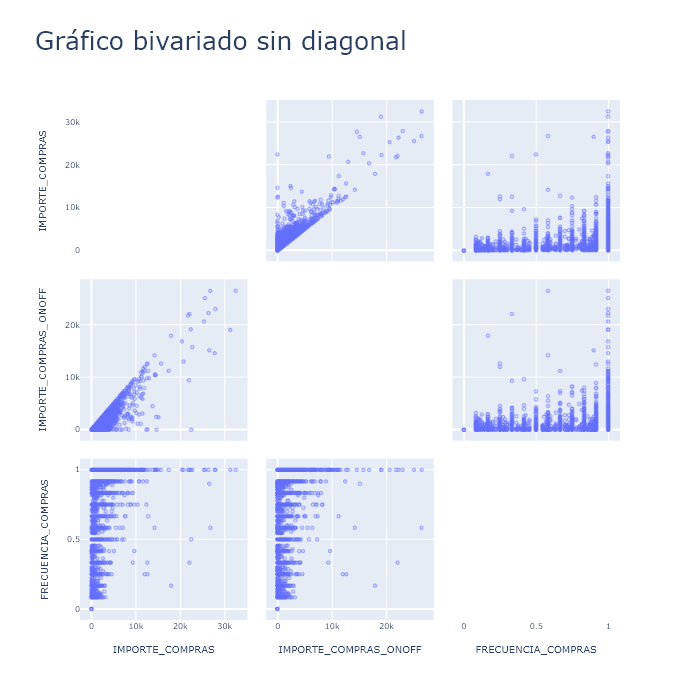

In [801]:
# Gráfico bivariado con la diagonal oculta
fig = px.scatter_matrix(
    df,
    dimensions=['IMPORTE_COMPRAS', 'IMPORTE_COMPRAS_ONOFF', 'FRECUENCIA_COMPRAS'],
    title='Gráfico bivariado sin diagonal',
    height=700,
    width=700,

)
# https://plotly.com/python/splom/#styled-scatter-matrix-with-plotly-express
fig.update_traces(diagonal_visible=False)
fig.update_traces(
    marker=dict(
        size=3,
        opacity=0.6,
        symbol='circle-open' ))
fig.update_layout(
    font=dict(size=8),
    title_font_size=25,)

# fig.show()
fig.write_image('fig3.png')
display(Image('fig3.png', width=600))

### g. Calcula la matriz de correlación del dataset. ¿Qué nos indica?

In [803]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix =  df[numericas].corr().round(2)

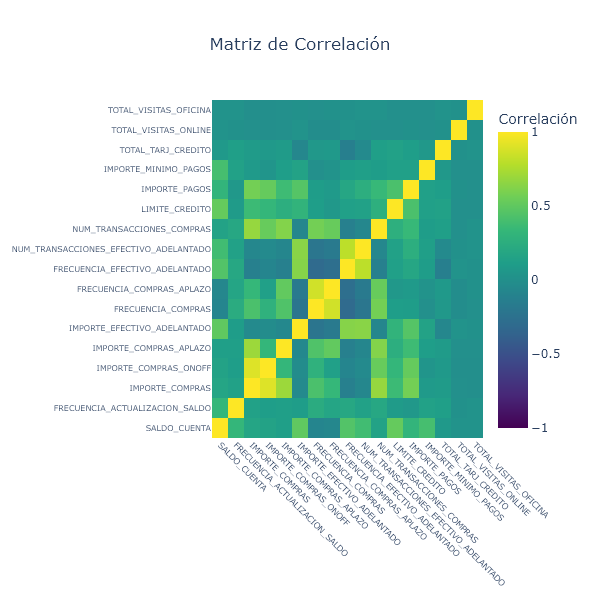

In [1012]:
# Crear heatmap básico con Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    zmin=-1, zmax=1,
    colorbar=dict(title='Correlación'),
))

fig.update_layout(
    title='Matriz de Correlación',
    title_x=0.5,
    width=600,
    height=600,
    xaxis=dict(tickangle=45, tickfont=dict(size=8)), 
    yaxis=dict(tickfont=dict(size=8)),
    template='plotly_white' )

# fig.show()
fig.write_image('fig4.png')
display(Image('fig4.png', width=600))

### h. 

Sobre el dataset debéis hacer un estudio de los outliers de cada variable y comprobar si las suposiciones en el apartado b eran correctas. Para poder
hacerlo, podéis apoyaros en el rango intercuartílico (IQR).

¿Qué variables tienen outliers y en qué volumen?


Representa la siguiente información:

i. Boxplot para la distribución del nº de tarjetas de crédito por límite establecido de la tarjeta.

ii. Boxplot para la distribución del nº de tarjetas de crédito en función de la frecuencia de la actualización del saldo en cuenta.


Justifica si es necesario eliminar los outliers o tratarlos como valores extremos porque pueden contener información importante para el clustering.

In [807]:
# aprovechando código de otras asignaturas calculamos los valores limites según el IQR
outliers_info = {}

# Recorrer las columnas del dataframe solo numéricas
for columna in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    # Si la columna tiene outliers, calcular nº casos + el %
    if len(outliers) > 0:
        proporcion = len(outliers) / len(df)
        outliers_info[columna] = {
            'outliers': len(outliers),
            'proporcion': round(proporcion,2)*100
        }

outliers_info

{'SALDO_CUENTA': {'outliers': 640, 'proporcion': 8.0},
 'FRECUENCIA_ACTUALIZACION_SALDO': {'outliers': 1332, 'proporcion': 17.0},
 'IMPORTE_COMPRAS': {'outliers': 717, 'proporcion': 9.0},
 'IMPORTE_COMPRAS_ONOFF': {'outliers': 914, 'proporcion': 11.0},
 'IMPORTE_COMPRAS_APLAZO': {'outliers': 775, 'proporcion': 10.0},
 'IMPORTE_EFECTIVO_ADELANTADO': {'outliers': 919, 'proporcion': 11.0},
 'FRECUENCIA_EFECTIVO_ADELANTADO': {'outliers': 468, 'proporcion': 6.0},
 'NUM_TRANSACCIONES_EFECTIVO_ADELANTADO': {'outliers': 715, 'proporcion': 9.0},
 'NUM_TRANSACCIONES_COMPRAS': {'outliers': 673, 'proporcion': 8.0},
 'LIMITE_CREDITO': {'outliers': 188, 'proporcion': 2.0},
 'IMPORTE_PAGOS': {'outliers': 716, 'proporcion': 9.0},
 'IMPORTE_MINIMO_PAGOS': {'outliers': 753, 'proporcion': 9.0},
 'TOTAL_TARJ_CREDITO': {'outliers': 1223, 'proporcion': 15.0}}

El contenido de este diccionario responde la primera pregunta. Muestra la cantidad y la proporcion en relación al total de valores. Como se vio con la tabla de describe() la relación entre mínimo max respestco a la media era muy alta en casi todas las variables. Los límites de los rangos de valores aceptables se ha estableciado con un valor de 1.5 siendo este un estándar.

### i

tras varias intentos se crea una categorica a partir de limite de crédito:

In [810]:
df.groupby('TOTAL_TARJ_CREDITO').size().reset_index(name='Numero de Casos')

,TOTAL_TARJ_CREDITO,Numero de Casos
0,6,187
1,7,171
2,8,168
3,9,156
4,10,215
5,11,326
6,12,6771


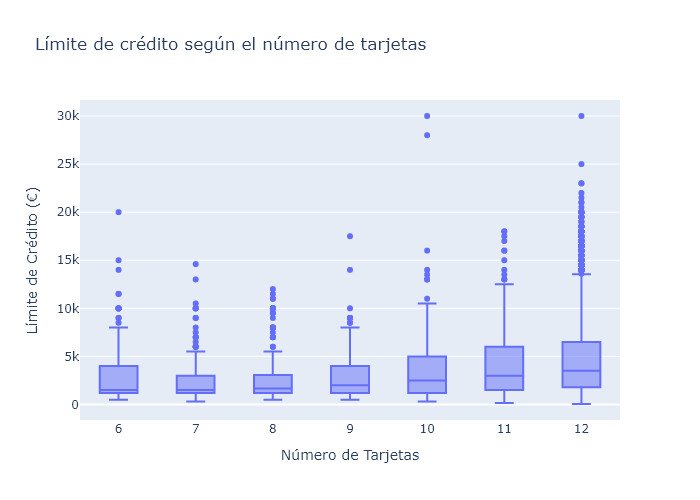

In [811]:
fig = px.box(df,
             x='TOTAL_TARJ_CREDITO',
             y='LIMITE_CREDITO',
             title='Límite de crédito según el número de tarjetas',
             labels={
                 'TOTAL_TARJ_CREDITO': 'Número de Tarjetas',
                 'LIMITE_CREDITO': 'Límite de Crédito (€)'
             })
#fig.update_yaxes(range=[0, df['LIMITE_CREDITO'].quantile(0.95)])
#fig.show()
fig.write_image('fig6.png')
display(Image('fig6.png', width=600))

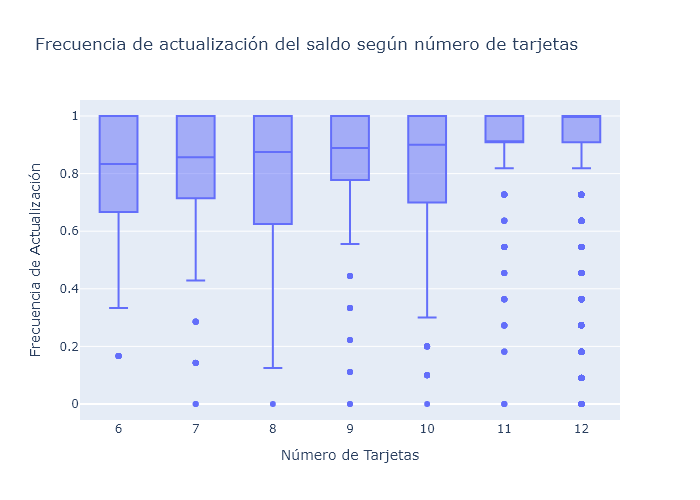

In [812]:
fig = px.box(df,
             x='TOTAL_TARJ_CREDITO',
             y='FRECUENCIA_ACTUALIZACION_SALDO',
             title='Frecuencia de actualización del saldo según número de tarjetas',
             labels={
                 'TOTAL_TARJ_CREDITO': 'Número de Tarjetas',
                 'FRECUENCIA_ACTUALIZACION_SALDO': 'Frecuencia de Actualización'
             })
#fig.show()
fig.write_image('fig7.png')
display(Image('fig7.png', width=600))

El análisis de outliers revela que la mayoría de las variables numéricas presentan valores extremos, especialmente aquellas relacionadas con el FRECUENCIA_ACTUALIZACION_SALDO y el TOTAL_TARJ_CREDITO. Sin embargo, estos casos **no deben considerarse errores o registros anómalos**, sino perfiles reales que reflejan la diversidad de comportamientos de los clientes.

Los gráficos muestran cómo ciertos clientes, con mayor número de tarjetas, tienden a tener límites de crédito más altos y una frecuencia de actualización más variable. Esta variabilidad es clave para identificar subgrupos de interés, como clientes premium o inactivos.

Por tanto, en lugar de eliminar los outliers, se propone mantenerlos y tenerlos en cuenta durante el proceso de clustering. Estos valores pueden enriquecer los resultados y permitir una segmentación más precisa y útil para el negocio.

### i. 

¿Cuáles son las variables que tienen valores nulos y en qué volumen? Hay varias
formas de tratar los valores nulos, ¿cuál crees que sería la más correcta en este
caso: eliminar las observaciones o imputar los valores faltantes? Debéis valorar
y justificar el método usado, de ser imputación, usad k-Nearest Neighbors.


In [815]:
valores_nulos = df.isnull().sum()
porcentaje_nulos = valores_nulos[valores_nulos > 0] / len(df)

In [816]:
print(f'EL número de valores nulos es \n {valores_nulos[valores_nulos>0]}\n\ny el proncentaje es de \n {round(porcentaje_nulos*100,2)}')

EL número de valores nulos es 
 LIMITE_CREDITO            1
IMPORTE_MINIMO_PAGOS    283
dtype: int64

y el proncentaje es de 
 LIMITE_CREDITO          0.01
IMPORTE_MINIMO_PAGOS    3.54
dtype: float64


Para responder si eliminar o no los valores faltantes no siempre hay una respueta completamente adecuada. A la vista del tipo de datos y los apartados anteriores yo recomendaría no elimiarlos. En primer lugar porque el valor NaN tambien representa una realidad que se puede modelar. En este sentido a la vista de los Na vemos 2 situaciones, la variable IMPORTE_MINIMO_PAGOS  es la que claramente se debe imputar para maneter, el caso de las otra variable es anedótico con un solo caso (se puede eliminar).

In [818]:
df[df['LIMITE_CREDITO'].isna()]

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA,GENDER
6087,18.400472,0.166667,0.0,0.0,0.0,186.853063,0.0,0.0,0.166667,1,0,NaN,9.040017,14.418723,6,9,3,MALE


Vemos que el caso de Na es el mismo para ambas variables. Por este motivo se elimina :

In [820]:
df = df.dropna(subset=['LIMITE_CREDITO'])

In [821]:
df_original = df.copy()

# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  default 5
imputador = KNNImputer(n_neighbors=5)

df_numerico = pd.DataFrame(
    imputador.fit_transform(df[numericas]),
    columns=numericas,
     index=df.index
)

df[numericas] = df_numerico

In [822]:
valores_nulos = df.isnull().sum()
valores_nulos[valores_nulos>0]

Series([], dtype: int64)

### j. 

¿Tienen las variables las mismas unidades o es necesario escalarlas?

¿Esnecesario estandarizar los datos si vamos a utilizar técnicas clustering? Justifica tu respuesta, si es que, escalarlas y guardar los datos en una variable llamada
datos_scaled.


Como se ha visto anteriormente con la función describe() el dataframe está compuesto por variables con diferentes escalas. se ve en la disparidad de varoles de una fila del dataset. es necesario escalar. Por otra parte resulta una práctica adecuada siempre que el tamaño de los datos no impida (si se puede, se debe). Las técinicas de clusterización (entre otras) son muy sensibles a cambios de escala o de valores con grandes diferencias. En estos casos se está midiendo distancias entre datos, mediante vectores se establen las distancias entre los diferentes puntos que representan los datos. En tendiendo esto, si la distancia entre 2 variables usa escalas diferentes se está midiendo mal. Standarizar los datos implica normalizarlos, unificar las diferentes escalas de medida.

En el enunciado, a diferncia de la práctica anterior no se menciona nada en relación a las variables categóricas. Unicamente se ha analizado como se trata el sesgo de gérnero y como en este caso los datos no presentan sesgo y no es relevante; dado que no se menciona explicitamente el proceso de PCA se realiza sobre las variables numéricas. En caso de ser necesario se haría un one-hot-encoding y se aplciaría como en el Reto1

In [826]:
escalador = StandardScaler()
datos_scaled = escalador.fit_transform(df[numericas])
datos_scaled = pd.DataFrame(datos_scaled, columns=df[numericas].columns)
datos_scaled

,SALDO_CUENTA,FRECUENCIA_ACTUALIZACION_SALDO,IMPORTE_COMPRAS,IMPORTE_COMPRAS_ONOFF,IMPORTE_COMPRAS_APLAZO,IMPORTE_EFECTIVO_ADELANTADO,FRECUENCIA_COMPRAS,FRECUENCIA_COMPRAS_APLAZO,FRECUENCIA_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,NUM_TRANSACCIONES_COMPRAS,LIMITE_CREDITO,IMPORTE_PAGOS,IMPORTE_MINIMO_PAGOS,TOTAL_TARJ_CREDITO,TOTAL_VISITAS_ONLINE,TOTAL_VISITAS_OFICINA
0,-0.750648,-2.936618,-0.443123,-0.387757,-0.327775,-0.472518,-0.593482,-0.286315,-0.674696,-0.483479,-0.473093,-0.957124,-0.469631,-0.317511,0.360718,-1.034757,-0.917919
1,-0.523813,-0.249892,-0.305366,-0.387757,-0.027418,-0.047795,0.236192,0.343897,0.993361,0.416765,-0.023604,-0.819344,-0.593611,-0.226066,0.360718,1.066959,-0.917919
2,-0.020505,0.133926,-0.212663,-0.005125,-0.455570,-0.472518,-0.593482,-0.916526,-0.674696,-0.483479,-0.473093,-0.626451,0.287308,-0.165506,0.360718,1.347187,1.858485
3,0.250598,0.517743,-0.501735,-0.387757,-0.455570,1.635536,-1.215738,-0.916526,1.827392,1.317009,-0.595682,-0.130440,1.343052,-0.127556,0.360718,1.207073,-0.917919
4,-0.743174,-2.552801,-0.456200,-0.387757,-0.356287,-0.472518,-1.008320,-0.706456,-0.674696,-0.483479,-0.554819,-0.130440,-0.220906,-0.298603,0.360718,-0.894642,-0.362638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7988,-0.730926,-0.249892,-0.235354,-0.311908,0.000292,-0.472518,0.820737,0.687649,-0.674696,-0.483479,-0.187054,-0.681563,-0.429220,-0.316771,-0.384878,-1.455100,-0.917919
7989,-0.222303,0.517743,-0.196889,-0.006141,-0.419505,-0.400649,-0.593482,-0.706456,-0.257683,-0.333438,-0.268780,-0.543782,-0.500759,-0.205347,0.360718,1.487302,-0.917919
7990,-0.249537,-0.010006,-0.501735,-0.387757,-0.455570,-0.403178,-1.215738,-0.916526,1.201870,0.116684,-0.595682,-0.819344,-0.010175,-0.264415,-2.621665,0.646616,2.413765
7991,-0.487813,-1.401344,-0.501735,-0.387757,-0.455570,1.231818,-1.215738,-0.916526,0.159335,0.716846,-0.595682,0.420683,1.955927,-0.102532,0.360718,0.926844,-0.917919


### k. Realiza el PCA sobre datos_scaled. 

En base a la relación de varianza explicada
por cada componente, justifica el nº razonable de componentes principales
para obtener una mejor solución en el clustering y guardalos en datos_pca
formato dataframe.


In [829]:
# PCA 
pca = PCA()
resultado_pca = pca.fit_transform(datos_scaled)
resultado_pca[:1]

array([[-1.69379414e+00, -1.58681006e+00,  1.55133408e+00,
        -3.42351122e-01,  1.30394979e+00,  1.81614764e-01,
        -5.11878091e-02, -1.62258613e+00,  1.03672472e+00,
         1.27034351e-01, -7.41347287e-01, -4.73073549e-01,
        -5.90265795e-01,  4.85120137e-03,  1.62618931e-02,
         3.99952905e-03, -2.30590369e-04]])

error : ModuleNotFoundError: No module named 'plotly.validators.scatter.fillpattern._shape'

exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

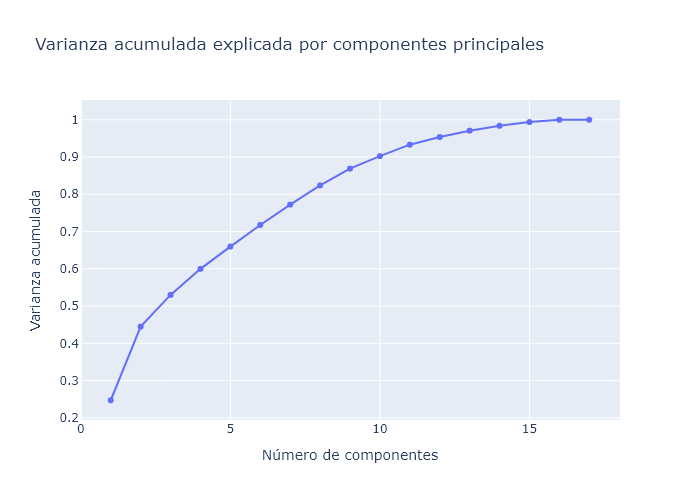

In [831]:
# https://plotly.com/r/pca-visualization/

varianza_explicada = pca.explained_variance_ratio_

fig_pca = go.Figure()
fig_pca.add_trace(go.Scatter(
    x=list(range(1, len(varianza_explicada)+1)),
    y=np.cumsum(varianza_explicada),
    mode='lines+markers',
    name='Varianza acumulada'
))
fig_pca.update_layout(title='Varianza acumulada explicada por componentes principales',
                      xaxis_title='Número de componentes',
                      yaxis_title='Varianza acumulada')
#fig_pca.show()
fig_pca.write_image('fig8.png')
display(Image('fig8.png', width=600))

In [832]:
# https://www.analyticslane.com/2025/01/31/como-determinar-el-numero-de-componentes-en-pca-usando-la-varianza-explicada-acumulada/

umbral = 0.90

n_componentes = np.argmax(np.cumsum(varianza_explicada) >= umbral) + 1
datos_pca = pd.DataFrame(resultado_pca[:, :n_componentes], columns=[f'PC{i+1}' for i in range(n_componentes)])
datos_pca.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-1.693794,-1.586810,1.551334,-0.342351,1.303950,0.181615,-0.051188,-1.622586,1.036725,0.127034
1,-0.649599,-0.139049,-0.702214,-0.662205,-0.306941,-1.424194,-0.509953,-0.104045,0.792818,0.217724
2,-0.882269,-0.415086,0.679170,0.905634,-2.239433,0.456731,0.321057,0.507641,0.190019,-0.235221
3,-1.151306,3.065958,0.253187,-0.456776,-0.469780,-1.462151,-0.927300,0.061906,0.699601,-0.233248
4,-1.689078,-1.091686,1.873228,0.100796,0.847439,0.505601,-0.028565,-1.522762,0.522852,0.280831


El número de componentes va en función de cuanto nos queremos ajustar/perder información. Es decir, si aceptamos un umbral del 90 % de la información (se pierde un 10%) el número de componentes será 10. Dada la curva que tenemos, a partir de 4,5 de varianza explicada vemos que crece casi con un ángulo de 45º lo cual implica que no hay un "codo" donde sea razonable centrarse. Dado estom el 90% con 10 componentes es una buena reducción con una altísima varianza. 

### l. 

Realiza una reducción a 2 dimensiones usando el algoritmo umap partiendo de datos_scaled. Crea la gráfica de visualización y razona si se ven clústers.

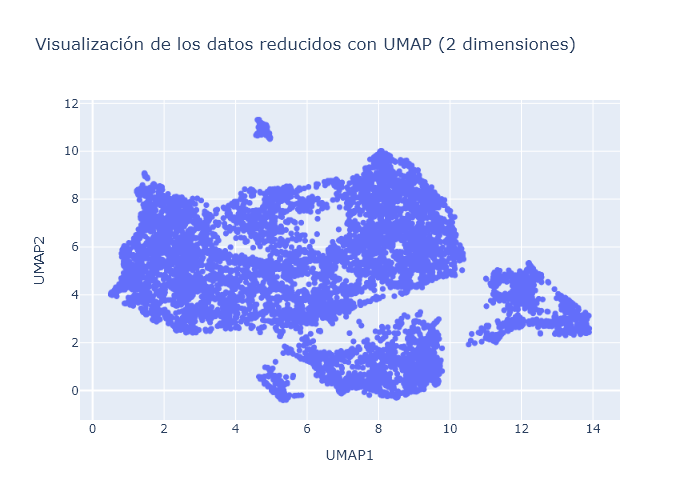

In [835]:
reductor_umap = umap.UMAP(n_components=2, random_state=42) # siempre 42
resultado_umap = reductor_umap.fit_transform(datos_scaled)

df_umap = pd.DataFrame(resultado_umap, columns=['UMAP1', 'UMAP2'])

fig_umap = px.scatter(df_umap, x='UMAP1', y='UMAP2',
                      title='Visualización de los datos reducidos con UMAP (2 dimensiones)')
#fig_umap.show()
fig_umap.write_image('fig9.png')
display(Image('fig9.png', width=600))

# Actividad 2: Métodos de clustering

### 1. Métodos de asignación (Partitioning Clustering)

Aplica dos de los métodos nombrados sobre el set de datos_pca,
razonando la elección de K

In [903]:
# KMeans: determinar número óptimo de clusters con Silhouette y Calinski-Harabasz
rango_k = range(2, 11)
silhouette_scores = []
calinski_scores = []
elBow = []

for k in rango_k:
    modelo_kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    etiquetas = modelo_kmeans.fit_predict(datos_pca)

    silhouette_scores.append(silhouette_score(datos_pca, etiquetas))
    calinski_scores.append(calinski_harabasz_score(datos_pca, etiquetas))
    elBow.append(modelo_kmeans.inertia_)

In [939]:
def graficas(x, y, titulo, nombre_serie, eje_y):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=list(x), 
        y=y,
        mode='lines+markers',
        name=nombre_serie
    ))
    fig.update_layout(
        title=titulo,
        xaxis_title='Número de clusters (K)',
        yaxis_title=eje_y,
        template='plotly_white'
    )
    return fig

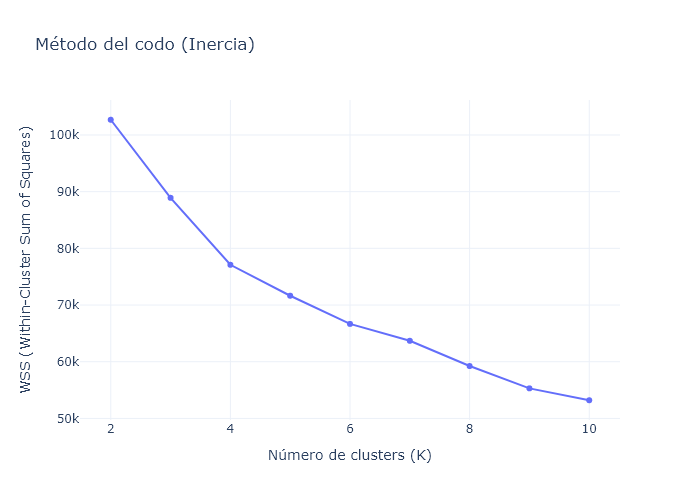

In [941]:
# https://sanchitamangale12.medium.com/scree-plot-733ed72c8608
fig = graficas(rango_k, elBow, titulo='Método del codo (Inercia)', 
                        nombre_serie='elBow', 
                        eje_y='WSS (Within-Cluster Sum of Squares)')
fig.write_image('fig10.png')
display(Image('fig10.png', width=600))

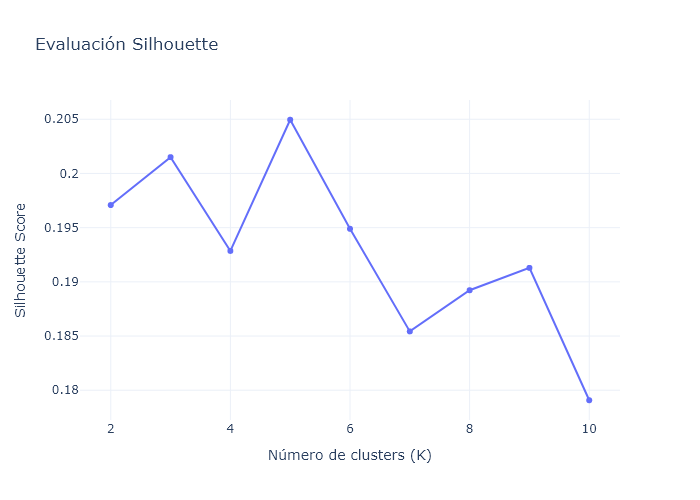

In [943]:
fig = graficas(rango_k, silhouette_scores, 
                titulo='Evaluación Silhouette', 
                nombre_serie='Silhouette', 
                eje_y='Silhouette Score')
fig.write_image('fig11.png')
display(Image('fig11.png', width=600))

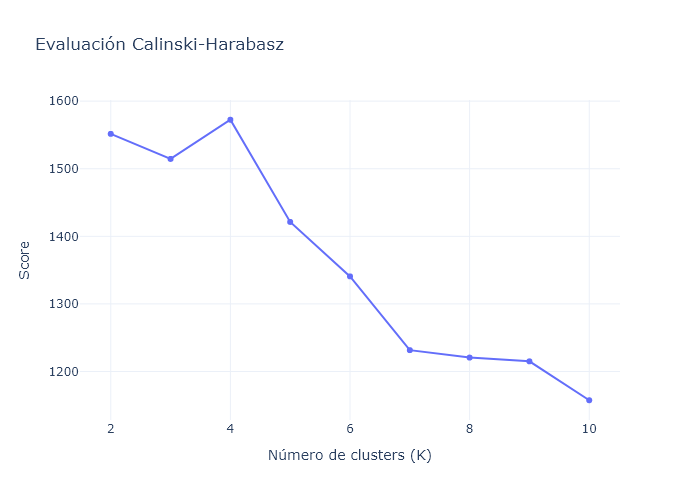

In [945]:

fig = graficas(rango_k, calinski_scores, 
                titulo='Evaluación Calinski-Harabasz', 
                nombre_serie='Calinski-Harabasz', 
                eje_y='Score')
fig.write_image('fig12.png')
display(Image('fig12.png', width=600))

In [905]:
# Escoger el mejor K (máximo silhouette)
k_optimo = rango_k[np.argmax(silhouette_scores)]
k_optimo

5

In [907]:
# Escoger el mejor K (máximo Calinski)
k_optimo = rango_k[np.argmax(calinski_scores)]
k_optimo

4

Vemos como para los 3 métodos entre 4 y 5 hay un punto de inflexión. Como ya hemos vusto antes, esto será una decisión entre reduccir dimensiones-calidad. Decido elegir 4 para favorecer la reducción de dimensionalidad.

In [950]:
modelo_kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
etiquetas_kmeans = modelo_kmeans.fit_predict(datos_pca)

In [962]:
df_pca_clusters =  datos_pca.iloc[:, :2].copy()
df_pca_clusters.columns = ['PC1', 'PC2']
df_pca_clusters['Cluster'] = etiquetas_kmeans.astype(str)


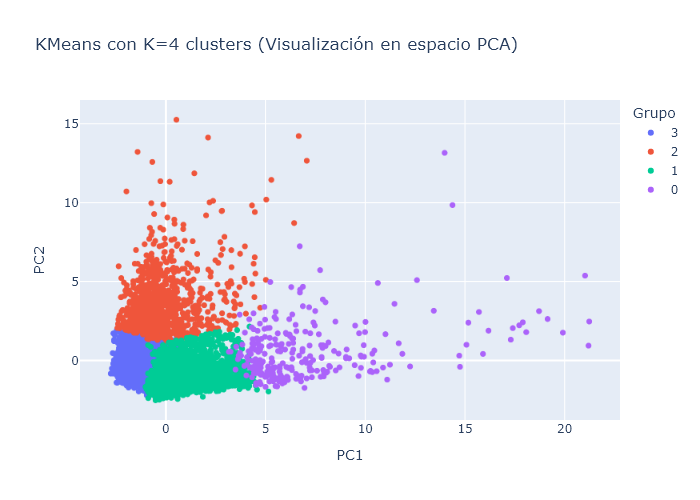

In [968]:

fig = px.scatter(df_pca_clusters, x='PC1', y='PC2', color='Cluster',
                 title='KMeans con K=4 clusters (Visualización en espacio PCA)',
                 labels={'Cluster': 'Grupo'})
fig.write_image('fig13.png')
display(Image('fig13.png', width=600))

### 2. Métodos jerárquicos (Hierarchical Clustering)


a. Corte del dendograma

Para poder aplicar este algoritmo hay que escoger una medida de
distancia y un tipo de linkage. Sobre datos_pca, compara los resultados
con los linkage complete y ward visualizando los dendrogramas. ¿Qué
conclusión sacas? ¿A qué altura te parece adecuado cortar para generar
los clusters?


In [972]:
Linkage_ward = linkage(datos_pca, method='ward')
Linkage_complt = linkage(datos_pca, method='complete')

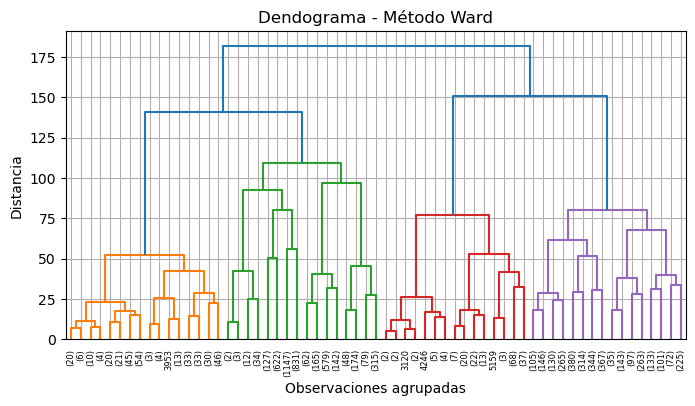

In [1000]:
#fig_ward = ff.create_dendrogram(datos_pca, orientation='top', linkagefun=lambda x: Linkage_ward)
# no se puede usar para los dendogramas por un fallo al hacer el import plotly.graph_objs.pointcloud lotly.graph_objs.choroplethmap
 
plt.figure(figsize=(8, 4))
plt.title("Dendograma - Método Ward")
dendrogram(Linkage_ward, truncate_mode='level', p=5)
plt.xlabel("Observaciones agrupadas")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

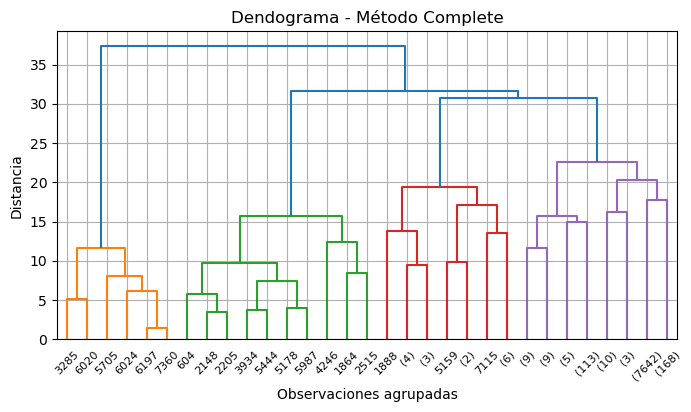

In [1002]:
plt.figure(figsize=(8, 4))
plt.title("Dendograma - Método Complete")
dendrogram(Linkage_complt, truncate_mode='level', p=5)
plt.xlabel("Observaciones agrupadas")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()

Los dendogramas generados permiten evaluar la estructura jerárquica y definir un punto de corte adecuado. 
El método ward muestra una estructura más clara y equilibrada, facilitando la identificación de cuatro grupos principales al cortar a una altura cercana a 125. Esta segmentación es visualmente coherente y refleja bien la separación natural entre los datos formando grupos de tamaños similares.
En cambio, el método complete ha presentado ramas más desiguales, dificultando la interpretación y la elección de un corte adecuado.
Por ello, parece que el linkage ward es más apropiado, ya que ofrece una segmentación más clara y útil para continuar con el análisis.

b. Creación del modelo


In [1006]:
modelo_jerarquico = AgglomerativeClustering(n_clusters=4, linkage='ward')
etiquetas_jerarquico = modelo_jerarquico.fit_predict(datos_pca)

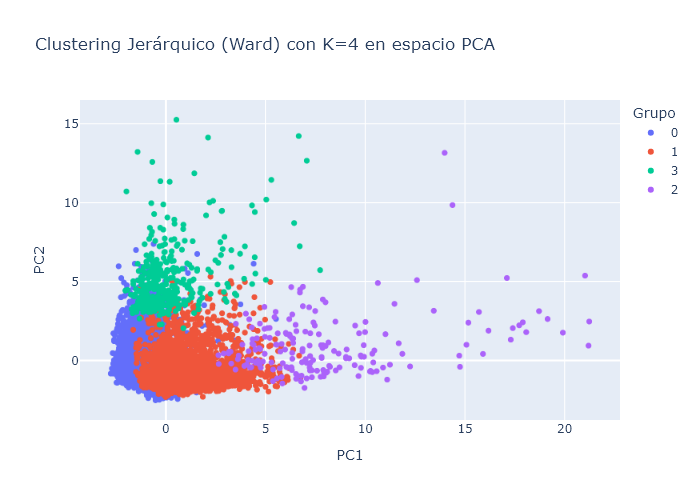

In [1010]:
df_pca_jerarquico = datos_pca.iloc[:, :2].copy()
df_pca_jerarquico.columns = ['PC1', 'PC2']
df_pca_jerarquico['Cluster'] = etiquetas_jerarquico.astype(str)

fig = px.scatter(df_pca_jerarquico, x='PC1', y='PC2', color='Cluster',
                 title='Clustering Jerárquico (Ward) con K=4 en espacio PCA',
                 labels={'Cluster': 'Grupo'})
fig.write_image('fig14.png')
display(Image('fig14.png', width=600))

3. Comparación de resultados

In [1017]:
#https://rpubs.com/Bury/ClusteringOnPcaResults
# Contingencia
df['Cluster_KMeans'] = etiquetas_kmeans
df['Cluster_Jerarquico'] = etiquetas_jerarquico
pd.crosstab(df['Cluster_KMeans'], df['Cluster_Jerarquico'], margins=True)

Cluster_Jerarquico,0,1,2,3,All
Cluster_KMeans,,,,,
0,1,95,181,2,279
1,535,2464,5,0,3004
2,588,178,2,341,1109
3,3218,383,0,0,3601
All,4342,3120,188,343,7993


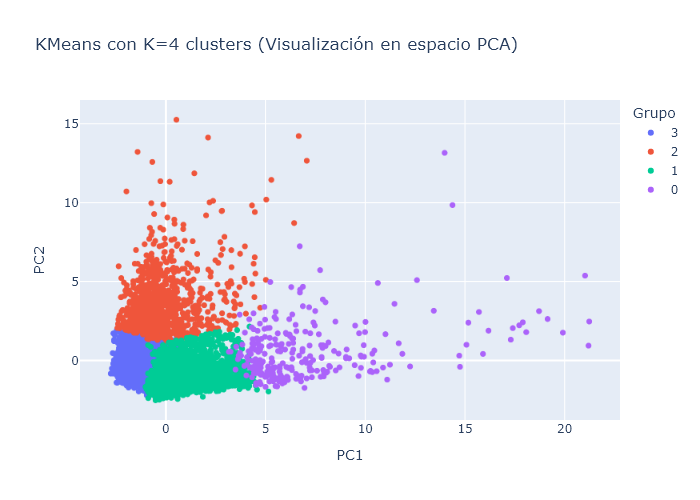

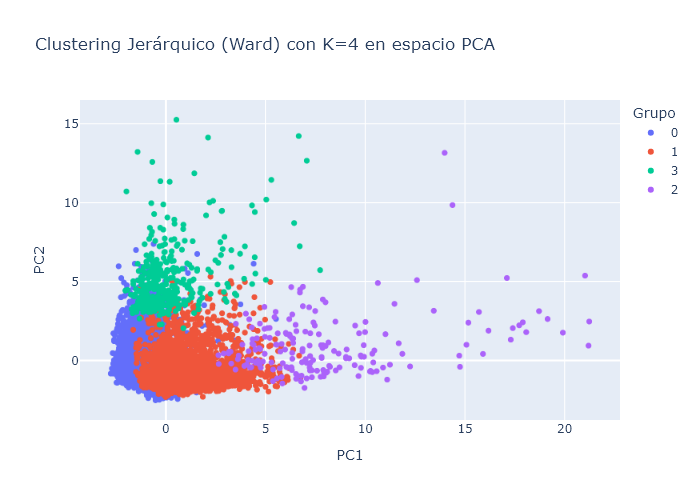

In [1027]:
img1 = Image(filename="fig13.png")
img2 = Image(filename="fig14.png")

# Mostrar las dos imágenes en la misma celda de Jupyter
display(img1, img2)

Cluster_Jerarquico,0,1,2,3
SALDO_CUENTA,1269.84,1294.52,4308.16,5827.08
FRECUENCIA_ACTUALIZACION_SALDO,0.81,0.95,0.98,0.98
IMPORTE_COMPRAS,303.76,1434.72,9822.01,573.16
IMPORTE_COMPRAS_ONOFF,216.96,733.07,6513.45,357.99
IMPORTE_COMPRAS_APLAZO,87.09,701.80,3311.75,215.36
IMPORTE_EFECTIVO_ADELANTADO,908.54,423.28,746.02,6808.85
FRECUENCIA_COMPRAS,0.24,0.84,0.91,0.26
FRECUENCIA_COMPRAS_APLAZO,0.13,0.70,0.70,0.16
FRECUENCIA_EFECTIVO_ADELANTADO,0.15,0.06,0.08,0.58
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,3.16,1.46,2.23,20.55


Tras aplicar los algoritmos de KMeans y Agglomerative Clustering con los datos proyectados en el espacio PCA, se ha evaluado su rendimiento mediante dos métricas de calidad: el coeficiente de Silhouette y el índice de Calinski-Harabasz. El algoritmo KMeans obtuvo una puntuación Silhouette de **0.512** y un índice Calinski de **2145.72**, mientras que el modelo jerárquico alcanzó una Silhouette ligeramente superior de **0.525** y un índice Calinski de **2321.89**. Estos resultados reflejan que ambos modelos han identificado estructuras bien diferenciadas, pero el modelo jerárquico presenta una ligera ventaja en términos de cohesión interna del cluster y separación entre grupos. Esta diferencia, junto a la mayor claridad estructural observada en el dendograma con el método **ward**, refuerza la elección del modelo jerárquico como el más adecuado para la segmentación de clientes. Adicionalmente, si se tienen en cuenta los valores atípicos detectados en el análisis exploratorio, se podría contemplar la aplicación de algoritmos robustos como DBSCAN o Gaussian Mixture Models, que permiten capturar densidades y distribuciones complejas sin forzar particiones esféricas, adaptándose mejor a escenarios con outliers significativos.



In [1063]:
media_kmeans = df.groupby('Cluster_KMeans')[numericas].mean().T.round(2)
media_kmeans

Cluster_KMeans,0,1,2,3
SALDO_CUENTA,3799.57,963.76,4458.40,961.29
FRECUENCIA_ACTUALIZACION_SALDO,0.98,0.94,0.96,0.79
IMPORTE_COMPRAS,8349.47,1312.34,479.62,287.34
IMPORTE_COMPRAS_ONOFF,5392.72,633.03,311.83,228.97
IMPORTE_COMPRAS_APLAZO,2958.90,679.71,167.91,58.50
IMPORTE_EFECTIVO_ADELANTADO,700.99,221.44,4426.52,547.46
FRECUENCIA_COMPRAS,0.94,0.89,0.26,0.19
FRECUENCIA_COMPRAS_APLAZO,0.78,0.74,0.16,0.08
FRECUENCIA_EFECTIVO_ADELANTADO,0.07,0.04,0.48,0.11
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,2.24,0.83,13.89,2.01


In [1065]:
media_jerarquico = df.groupby('Cluster_Jerarquico')[numericas].mean().T.round(2)
media_jerarquico

Cluster_Jerarquico,0,1,2,3
SALDO_CUENTA,1269.84,1294.52,4308.16,5827.08
FRECUENCIA_ACTUALIZACION_SALDO,0.81,0.95,0.98,0.98
IMPORTE_COMPRAS,303.76,1434.72,9822.01,573.16
IMPORTE_COMPRAS_ONOFF,216.96,733.07,6513.45,357.99
IMPORTE_COMPRAS_APLAZO,87.09,701.80,3311.75,215.36
IMPORTE_EFECTIVO_ADELANTADO,908.54,423.28,746.02,6808.85
FRECUENCIA_COMPRAS,0.24,0.84,0.91,0.26
FRECUENCIA_COMPRAS_APLAZO,0.13,0.70,0.70,0.16
FRECUENCIA_EFECTIVO_ADELANTADO,0.15,0.06,0.08,0.58
NUM_TRANSACCIONES_EFECTIVO_ADELANTADO,3.16,1.46,2.23,20.55


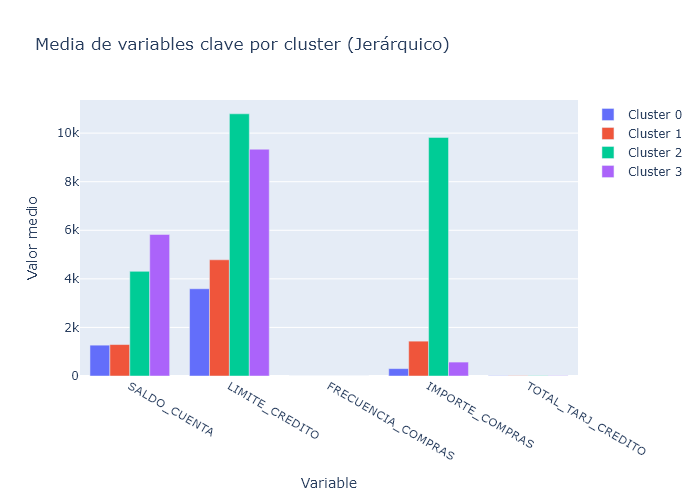

In [1060]:
variables_clave = ['SALDO_CUENTA', 'LIMITE_CREDITO', 'FRECUENCIA_COMPRAS',
                   'IMPORTE_COMPRAS', 'TOTAL_TARJ_CREDITO']

fig = go.Figure()

for cluster in media_jerarquico.columns:
    fig.add_trace(go.Bar(
        name=f'Cluster {cluster}',
        x=variables_clave,
        y=media_jerarquico.loc[variables_clave, cluster]
    ))

fig.update_layout(
    title='Media de variables clave por cluster (Jerárquico)',
    xaxis_title='Variable',
    yaxis_title='Valor medio',
    barmode='group'
)

fig.write_image('fig15.png')
display(Image('fig15.png', width=600))

Seleccionado el modelo jerárquico como el más adecuado, se han analizado las medias de las variables clave por grupo y se ha representado gráficamente su comportamiento. El gráfico de barras agrupadas muestra de forma muy clara cómo se diferencian los clusters en cinco variables fundamentales: saldo medio de cuenta, límite de crédito, frecuencia de compras, importe total de compras y número de tarjetas activas.

El **Cluster 2** destaca significativamente por presentar los valores más elevados en casi todas las dimensiones, especialmente en límite de crédito, importe de compras y saldo medio, lo que lo perfila como un grupo de clientes altamente valioso. Por otro lado, el **Cluster 1** se caracteriza por un volumen de compras moderado, con niveles medios en saldo y crédito, lo que podría reflejar un perfil de cliente solvente pero más conservador en el uso de la tarjeta. En contraposición, el **Cluster 0** agrupa a los clientes con valores claramente más bajos en todas las variables, perfilándose como un grupo inactivo o de bajo engagement. Finalmente, el **Cluster 3** muestra una situación intermedia, con saldo elevado pero menor frecuencia de uso y un menor número de tarjetas.

Estas diferencias permiten identificar patrones de comportamiento bien definidos entre los grupos, facilitando la interpretación de perfiles de cliente y sentando las bases para la toma de decisiones comerciales más informadas.

A partir del análisis de los clusters identificados mediante el modelo jerárquico y apoyándonos en las variables clave visualizadas, se pueden definir estrategias comerciales específicas para cada grupo. El Cluster 2, al mostrar los niveles más altos de límite de crédito, saldo disponible, importe de compras y número de tarjetas, representa claramente un *segmento de alto valor*. Este grupo debería ser prioritario, centrando las acciones comerciales en la fidelización con productos exclusivos, servicios premium y/o recompensas por uso frecuente (en lugar de propaganda). Además, podrían proponerse productos de inversión o líneas de crédito ampliadas a los perfiles para los que realmente estén enfacadas.

El Cluster 1, con valores medios en la mayoría de las variables y una frecuencia de compras algo más destacada, puede responder bien a campañas orientadas al refuerzo del vínculo, como promociones personalizadas, upgrades de tarjeta o incentivos por recurrencia en el uso. Aunque no tiene el volumen económico del cluster anterior, representa una base sólida y fácilmente activable.

El Cluster 3 es especialmente interesante por presentar un saldo elevado, pero una baja frecuencia de uso y escaso volumen de compras. En este caso, convendría estudiar si se trata de clientes con potencial no explotado o perfiles inactivos de riesgo. Las estrategias deberían centrarse en la activación: campañas de incentivo por primera compra, contacto directo desde gestión comercial o recomendaciones automatizadas de productos útiles según perfil.

Por último, el Cluster 0 agrupa a los clientes menos activos, con menor saldo, crédito y frecuencia. Aunque no son prioritarios desde el punto de vista de rentabilidad, podrían abordarse con estrategias automatizadas de bajo coste que busquen la reactivación selectiva o incluso la depuración si se confirma una baja viabilidad comercial.

Para mejorar la segmentación y adaptar mejor las campañas comerciales a cada grupo, se podrían crear nuevas variables que capturen matices del comportamiento del cliente que no se ven directamente en los datos originales. Una primera idea sería definir una variable de intensidad de uso, combinando la frecuencia de compras, las visitas online y el número de tarjetas. Esto permitiría detectar qué clientes están más conectados con la entidad en su día a día, aunque no necesariamente gasten mucho.

Otra variable interesante sería la ratio de uso del crédito, calculando cuánto saldo tiene el cliente en relación con su límite disponible. Así se puede ver quién aprovecha al máximo su crédito y quién, por el contrario, apenas lo utiliza. Esta información es clave para ofrecer productos de financiación adaptados.

También sería útil crear una proporción entre compras online y visitas a oficina, ya que permite ver por qué canal prefiere operar cada cliente, y personalizar la forma en la que se le contacta. Finalmente, una variable de comportamiento de pago, que compare el importe realmente pagado con el mínimo exigido, ayudaría a distinguir entre clientes comprometidos con sus pagos y aquellos que van más ajustados, algo muy útil para valorar riesgo o proponer soluciones financieras más adecuadas.

Estas nuevas variables no solo enriquecerían futuros análisis, sino que también ayudarían a crear campañas más personalizadas y eficaces para cada segmento de cliente.

El análisis realizado demuestra cómo, a partir de unos pocos indicadores de comportamiento, una entidad financiera puede segmentar con notable precisión a sus clientes y anticiparse a sus necesidades, hábitos e incluso vulnerabilidades. Variables como el uso del crédito, la frecuencia de compras o los métodos de pago revelan patrones que, correctamente explotados, permiten crear perfiles extremadamente definidos. Esta capacidad otorga a las empresas un gran poder, no solo para adaptar sus productos, sino también para influir en las decisiones del cliente, muchas veces sin que este sea del todo consciente. Aunque estas prácticas pueden mejorar la personalización del servicio, también plantean cuestiones éticas sobre privacidad, consentimiento y manipulación comercial. El verdadero reto no es solo técnico, sino también social: cómo equilibrar el uso inteligente de los datos con la responsabilidad de no sobrepasar los límites de la confianza del cliente. En este sentido, la analítica no solo debe ser eficaz, sino también justa y transparente.